# CSCI 4455/5455 – Spring 2020 
### Assignment 1 - Know Your Data/Data Preprocessing

In 2014, a new disease caused by "T-Virus" had spread over the world. A medical research center developed two different medicines, Anti-A and Anti-B. However, the researchers didn't know how to treat patients with the two medicines, and so decided to do some experiments by injecting different combinations of the two medicines to 40 infected patients for a month. After one month, the researchers measured the amount of t-virus in the patients' blood. Assumes all patients had 100% T-Virus before getting the treatments. 

In [152]:
import pandas as pd
import math
import warnings # for hiding warnings
warnings.filterwarnings('ignore')

In [153]:
base_path = r'' # path to the folder that contains the dataset.csv. leave it blank in your submission
dataset_name = 'dataset.csv'
dataset_path = rf'{base_path}/{dataset_name}'

Load the dataset and check the first 10 rows

In [154]:
# DO NOT EDIT THIS CELL
dataset = pd.read_csv(dataset_path)
dataset.head(10)

,anti_a,anti_b,t_virus
0,5.76,94.4,9.3
1,7.90,15.5,11.5
2,4.41,4.8,15.2
3,8.70,48.3,15.8
4,2.84,78.9,11.5
5,2.84,33.6,77.9
6,7.31,58.4,74.9
7,4.24,53.3,60.0
8,9.83,55.3,8.4
9,7.59,76.7,73.4


get the summary statistics

In [155]:
# DO NOT EDIT THIS CELL
dataset.describe()

,anti_a,anti_b,t_virus
count,40.000000,40.000000,40.000000
mean,5.116250,49.577500,37.465000
std,3.157834,31.436003,30.809885
min,0.170000,1.600000,6.000000
25%,2.582500,19.650000,11.275000
50%,5.415000,50.450000,16.150000
75%,7.522500,80.025000,69.275000
max,9.940000,98.800000,90.700000


and check the number of records

In [156]:
# DO NOT EDIT THIS CELL
len(dataset)

40

#### Question 1: Equal Width Partitioning (15 Points)
complete the below function

parameters:
- values (not sorted) as a list
- the number of bins as an integer

returns a tuple containing:
- bin width => as a float
- bounds for the bins => as a nested list. Each item (bounds[i]) contains the lower bound and the upper bound for the bins[i]
- list of bins => as a nested list. bins[i] is a list of sorted values for the i-th bin



In [157]:
def equal_width_partitioning(values, bin_count):
    values.sort()
    bin_count = int(bin_count)
    bins = []
    bounds = []
    value_range = max(values) - min(values)
    width = value_range / bin_count
    min_values = min(values)
    
    for i in range(0,bin_count):
        temp = []
        for r in values:
            if r >= min_values+(i*width) and r <= min_values+((i+1)*width):
                temp += [r]
        bounds.append([min_values+(i*width),min_values+((i+1)*width)])  
        bins.append(temp)
    return (width, bounds, bins)

In [158]:
# DO NOT EDIT THIS CELL
t_virus = list(dataset['t_virus']) # get the t-virus values
bin_count = 5 # set the bin count to 5
(width, bounds, bins) = equal_width_partitioning(t_virus, bin_count) # call the binning function

print(f"partition width: {width}") #print the results
for i in range(len(bins)):
    s = "[" if i==0 else "("
    bin_values = ', '.join(str(x) for x in bins[i])
    print(f"{s}{bounds[i][0]}, {bounds[i][1]}] => {bin_values}")     

partition width: 16.94
[6.0, 22.94] => 6.0, 6.7, 7.5, 7.6, 8.4, 9.3, 9.4, 9.6, 10.6, 11.2, 11.3, 11.5, 11.5, 11.9, 13.0, 13.8, 14.1, 14.9, 15.2, 15.8, 16.5, 17.7, 21.4
(22.94, 39.88] => 
(39.88, 56.82000000000001] => 55.5
(56.82000000000001, 73.76] => 60.0, 61.4, 62.1, 64.9, 64.9, 69.0, 70.1, 73.4
(73.76, 90.7] => 74.9, 76.8, 77.0, 77.9, 80.1, 81.2, 83.8, 90.7


#### Question 2: Equal-depth (equal-frequency) Partitioning (15 Points)
complete the below function

parameters:
- values (not sorted) => as a list
- the number of values in each bin (not the number of bins). The last bin can be unfull if there are not enough elements.

returns a tuple containing:
- bounds for the bins => as a nested list. Each item (bounds[i]) contains the lower bound and the upper bound for the bins[i]
- list of bins => as a nested list. bins[i] is a list of sorted values for the i-th bin

In [159]:
def equal_depth_partitioning(values, bin_frequency):
    bins = []
    bounds = []
    values.sort()
    bin_frequency = int(bin_frequency)
    bin_count = -(-len(values)//bin_frequency) # round the result up
    remainder = len(values) % bin_frequency
    
    for i in range(0,bin_count-1):
        bins.append(values[(i*bin_frequency):(i*bin_frequency+bin_frequency)])
        bounds.append([values[i*bin_frequency],values[i*bin_frequency+bin_frequency-1]])
    
#     for the last bin, in case of the length of values is not divisible by bin_frequency
    if remainder != 0:
        bins.append(values[((bin_count-1)*bin_frequency) : (bin_count-1)*bin_frequency + remainder])
        bounds.append([values[(bin_count-1)*bin_frequency],values[-1]])
    else:
        bins.append(values[((bin_count-1)*bin_frequency) : (bin_count)*bin_frequency])
        bounds.append([values[(bin_count-1)*bin_frequency],values[-1]])
    
    return (bounds, bins)

In [160]:
# DO NOT EDIT THIS CELL
t_virus = list(dataset['t_virus'])
bin_frequency = 5
(bounds, bins) = equal_depth_partitioning(t_virus, bin_frequency)

for i in range(len(bins)):
    bin_values = ', '.join(str(x) for x in bins[i])
    print(f"[{bounds[i][0]}, {bounds[i][1]}] => {bin_values}")

[6.0, 8.4] => 6.0, 6.7, 7.5, 7.6, 8.4
[9.3, 11.2] => 9.3, 9.4, 9.6, 10.6, 11.2
[11.3, 13.0] => 11.3, 11.5, 11.5, 11.9, 13.0
[13.8, 15.8] => 13.8, 14.1, 14.9, 15.2, 15.8
[16.5, 60.0] => 16.5, 17.7, 21.4, 55.5, 60.0
[61.4, 69.0] => 61.4, 62.1, 64.9, 64.9, 69.0
[70.1, 77.0] => 70.1, 73.4, 74.9, 76.8, 77.0
[77.9, 90.7] => 77.9, 80.1, 81.2, 83.8, 90.7


#### Question 3: Grouping (15 Points)
Now, divide the 40 patients into two groups such that one group has much lower T-Virus than the other. To find the cut-off value, we need to find the largest gap between the two consecutive values. Complete the below function that returns the smallest value that should be assigned to the second group (you can use the results from the partitioning analysis above to verify your answer). 

inputs:
- values (not sorted) as a list

returns:
- the cut-off value

In [161]:
def find_first_value(values):
    values.sort()
    gap = []
    for i in range(0,len(values)-1):
        gap.append(abs(values[i]-values[i+1]))
    gap_maxindex = gap.index(max(gap))
    cutoff = values[gap_maxindex+1]
    return cutoff

In [162]:
# DO NOT EDIT THIS CELL
t_virus = list(dataset['t_virus'])
cut_off = find_first_value(t_virus)
print(f"first value of the second group should be: {cut_off}")
group1 = dataset[dataset['t_virus'] < cut_off]
group2 = dataset[dataset['t_virus'] >= cut_off]

first value of the second group should be: 55.5


#### Question 4: Measure of Central Tendency  (10 Points):
complete the below functions to compute the mean and median of for a given unsorted list

input:
- values (not sorted) as a list

returns:
- the mean of the values as a float

In [163]:
def get_mean(values):
    mean_values = sum(values) / len(values)
        
    return mean_values

input:
- values (not sorted) as a list

returns:
- the median of the values as a floa

In [164]:
def get_median(values):
    values.sort()
    if len(values) % 2 ==0:
        m = int(len(values)/2)
        median_values = (values[m-1]+values[m])/2
    else:
        m = int(len(values)//2)
        median_values = values[m]

    return median_values

In [165]:
# DO NOT EDIT THIS CELL
print(f"group 1\t\tmean: {get_mean(list(group1['t_virus']))} \tmedian: {get_median(list(group1['t_virus']))}")
print(f"group 2\t\tmean: {get_mean(list(group2['t_virus']))} \tmedian: {get_median(list(group2['t_virus']))}")

group 1		mean: 11.95217391304348 	median: 11.5
group 2		mean: 71.98235294117647 	median: 73.4


#### Question 5: Data Normalization (15 Ppoints) 
Complete the following function that normalizes the values using the min-max normalization method:<br/>
input:
- values (not sorted) as a list

returns:
- min-max normalized values

In [166]:
def min_max(values):
    normalized_values = []
    for i in range(0,len(values)):
        normalized_values.append((values[i]-min(values))/(max(values)-min(values)))
    return normalized_values

In [167]:
# DO NOT EDIT THIS CELL
group1['anti_a'] = min_max(list(group1['anti_a']))
group1['anti_b'] = min_max(list(group1['anti_b']))

group2['anti_a'] = min_max(list(group2['anti_a']))
group2['anti_b'] = min_max(list(group2['anti_b']))

In [168]:
# DO NOT CHANGE THIS CELL
group1

,anti_a,anti_b,t_virus
0,0.572160,0.961658,9.3
1,0.791198,0.144041,11.5
2,0.433982,0.033161,15.2
3,0.873081,0.483938,15.8
4,0.273286,0.801036,11.5
8,0.988741,0.556477,8.4
11,0.720573,0.196891,14.9
12,0.262027,0.679793,9.4
13,0.294780,0.877720,16.5
15,0.004094,0.393782,11.2


In [169]:
# DO NOT CHANGE THIS CELL
group2

,anti_a,anti_b,t_virus
5,0.276596,0.272321,77.9
6,0.836045,0.549107,74.9
7,0.451815,0.492187,60.0
9,0.871089,0.753348,73.4
10,0.000000,0.023438,61.4
14,0.687109,0.292411,70.1
16,0.818523,0.867188,76.8
17,0.823529,0.879464,90.7
18,0.295369,0.127232,77.0
20,1.000000,0.777902,81.2


#### Question 6 (15 Points)
Complete the below function that computes the Pearson correlation coefficient between the normalized Anti-A and normalized Anti-B for each group
input: 
- X: values for anti-a
- Y: values for anti-b

returns:
- the Pearson correlation => as a flot

In [170]:
def get_pearson(X, Y):
    mean1 = get_mean(X)
    mean2 = get_mean(Y)
    var1 = sum([((float(i) - mean1) ** 2) for i in X]) / (len(X)-1)
    var2 = sum([((float(i) - mean2) ** 2) for i in Y]) / (len(Y)-1)
    std1 = var1 ** 0.5
    std2 = var2 ** 0.5
    products = [a * b for a, b in zip(X, Y)]
    pearson = (sum(products)-len(X)*mean1*mean2)/((len(X)-1)*std1*std2)
    
    return pearson

In [171]:
# DO NOT EDIT THIS CELL
peasron1 = get_pearson(list(group1['anti_a']),list(group1['anti_b']))
peasron2 = get_pearson(list(group2['anti_a']),list(group2['anti_b']))

print(f"Pearson correlation\n\tGroup1: {peasron1},\n\tGroup2: {peasron2}")

Pearson correlation
	Group1: -0.449627472545992,
	Group2: 0.8938242533758364


#### Question 7: Analytical Thinking (15 Points)
Based on the above analyses, conclude how to best use the two medicines to fight with T-Virus. Your answer is expected to analytical, not just numbers. You need to justify your answer.

Your answer: 

Based on the answer of Question 4, we can find that the mean and median values of group 1 is much less than group 2, so we can defined that group 1 includes the patients who has a little amount of t-virus in the their blood, and the group 2 is patients with high virus amount.

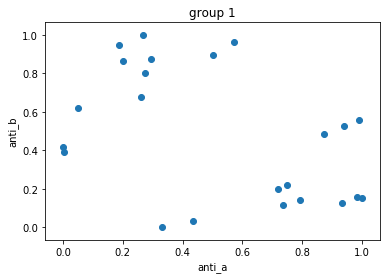

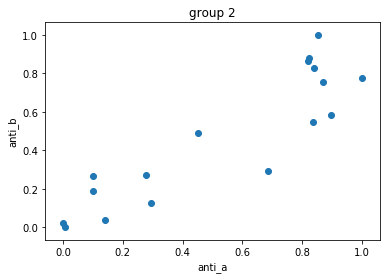

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(list(group1['anti_a']),list(group1['anti_b']))
plt.xlabel('anti_a')
plt.ylabel('anti_b')
plt.title('group 1')
plt.show()
plt.xlabel('anti_a')
plt.ylabel('anti_b')
plt.title('group 2')
plt.scatter(list(group2['anti_a']),list(group2['anti_b']))
plt.show()

Then, based on the Question 6, as shown in the above figure, in the group 2, anti_a and anti_b is strong positive correlated, it means that if we use the same level of amount of anti_a and anti_b, the effects of anti_a and anti_b may be mutually exclusive, leading to increased amount of T-virus. However, in the group 1, the correlation between anti_A and anti_B is negtive weak, and the amount of T-virus is very lower than group 2. 

What's more, as the following figure shows, the bigger the difference between using level of two medicines, the less amount of T-Virus. We can draw a conclusion that we can't use same level of anti_A and anti_B(both are normalized value), we can use higher amount of anti_A and lower amount of anti_B and vice versa to fight with T-Virus. For example, in the group 1, when the T-virus is the minimum value(6.0), we used lower anti_a(=0.266121) and the highest anti_b(=1.0), and when the T-virus is 6.7, we used higher anti_a(=0.984647) and lower anti_b(=0.157513). 

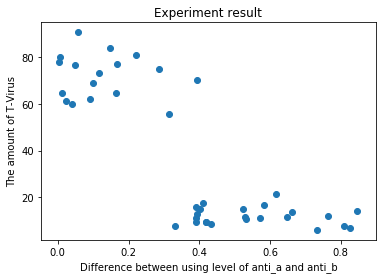

In [173]:
group1['difference'] = abs(group1['anti_a'] - group1['anti_b'])
group2['difference'] = abs(group2['anti_a'] - group2['anti_b'])

group=list(group1['difference'])+list(group2['difference'])
t_virus = list(group1['t_virus'])+list(group2['t_virus'])

plt.scatter(group,t_virus)
plt.xlabel('Difference between using level of anti_a and anti_b')
plt.ylabel('The amount of T-Virus')
plt.title('Experiment result')
plt.show()